In [1]:
import os

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import Sequence

import pandas as pd
import numpy as np

from RoadDataset import RoadDataset
from MultiRoadDataset import MultiRoadDataset

In [2]:
train_datasets_path = "../notebooks/datasets/train/"
sub_dirs = os.listdir(train_datasets_path)
train_dataset_paths = [[train_datasets_path + sub_dir + "/" + sub_dir + ".csv", train_datasets_path + sub_dir + "/frames/"] for sub_dir in sub_dirs]
train_dataset_paths

[['../notebooks/datasets/train/Sun Dec 27 18_09_33 2020/Sun Dec 27 18_09_33 2020.csv',
  '../notebooks/datasets/train/Sun Dec 27 18_09_33 2020/frames/'],
 ['../notebooks/datasets/train/Sun Dec 27 17_46_56 2020/Sun Dec 27 17_46_56 2020.csv',
  '../notebooks/datasets/train/Sun Dec 27 17_46_56 2020/frames/'],
 ['../notebooks/datasets/train/Sun Feb 21 21:50:50 2021/Sun Feb 21 21:50:50 2021.csv',
  '../notebooks/datasets/train/Sun Feb 21 21:50:50 2021/frames/'],
 ['../notebooks/datasets/train/Sun Dec 27 18_01_53 2020/Sun Dec 27 18_01_53 2020.csv',
  '../notebooks/datasets/train/Sun Dec 27 18_01_53 2020/frames/'],
 ['../notebooks/datasets/train/Wed Dec 30 17_34_37 2020/Wed Dec 30 17_34_37 2020.csv',
  '../notebooks/datasets/train/Wed Dec 30 17_34_37 2020/frames/'],
 ['../notebooks/datasets/train/Sun Jan 10 11:31:18 2021/Sun Jan 10 11:31:18 2021.csv',
  '../notebooks/datasets/train/Sun Jan 10 11:31:18 2021/frames/'],
 ['../notebooks/datasets/train/Sun Dec 27 18_25_24 2020/Sun Dec 27 18_25_24 

In [3]:
column_names = ['filename','steering_wheel_angle','speed', 'blink_l', 'blink_r']
my_batch_size = 16
multi_train_dataset = MultiRoadDataset(column_names, batch_size=my_batch_size)

for train_dataset_path in train_dataset_paths:
    multi_train_dataset.addRoadDataset(train_dataset_path[0], train_dataset_path[1])
    

Reading csv file: ../notebooks/datasets/train/Sun Dec 27 18_09_33 2020/Sun Dec 27 18_09_33 2020.csv
Loaded dataset with 8096 samples
Reading csv file: ../notebooks/datasets/train/Sun Dec 27 17_46_56 2020/Sun Dec 27 17_46_56 2020.csv
Loaded dataset with 3775 samples
Reading csv file: ../notebooks/datasets/train/Sun Feb 21 21:50:50 2021/Sun Feb 21 21:50:50 2021.csv
Failed to read csv file!
Loaded dataset with 0 samples
Reading csv file: ../notebooks/datasets/train/Sun Dec 27 18_01_53 2020/Sun Dec 27 18_01_53 2020.csv
Loaded dataset with 7060 samples
Reading csv file: ../notebooks/datasets/train/Wed Dec 30 17_34_37 2020/Wed Dec 30 17_34_37 2020.csv
Loaded dataset with 3112 samples
Reading csv file: ../notebooks/datasets/train/Sun Jan 10 11:31:18 2021/Sun Jan 10 11:31:18 2021.csv
Loaded dataset with 17985 samples
Reading csv file: ../notebooks/datasets/train/Sun Dec 27 18_25_24 2020/Sun Dec 27 18_25_24 2020.csv
Loaded dataset with 2793 samples
Reading csv file: ../notebooks/datasets/train/

# SWA vs speed:

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide


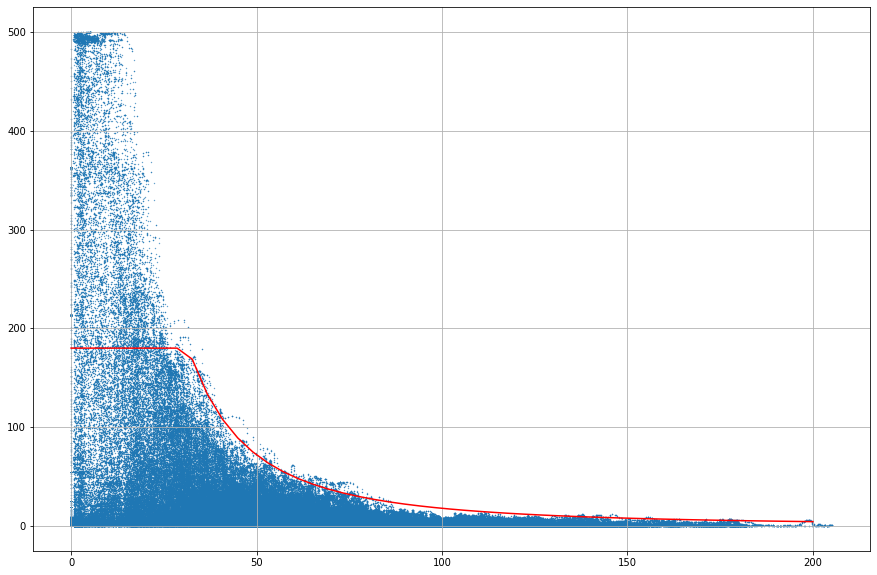

In [18]:
swas = multi_train_dataset.get_csv()['steering_wheel_angle']
speeds = multi_train_dataset.get_csv()['speed']

#remove -999 dummy speed value
no_speeds_indices = speeds[speeds < 0].index
speeds = speeds.drop(no_speeds_indices)
swas = swas.drop(no_speeds_indices)
swas = abs(swas)


from matplotlib import pyplot as plt
plt.figure(figsize=(15,10))
plt.grid(True)
plt.scatter(x=speeds, y=swas, s=.1)

vel = np.linspace(0, 200)
envelope = 180000/(vel**2)
envelope = np.clip(envelope, 0, 180)

plt.plot(vel, envelope, color='red')

#plt.ylim(0, 50)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


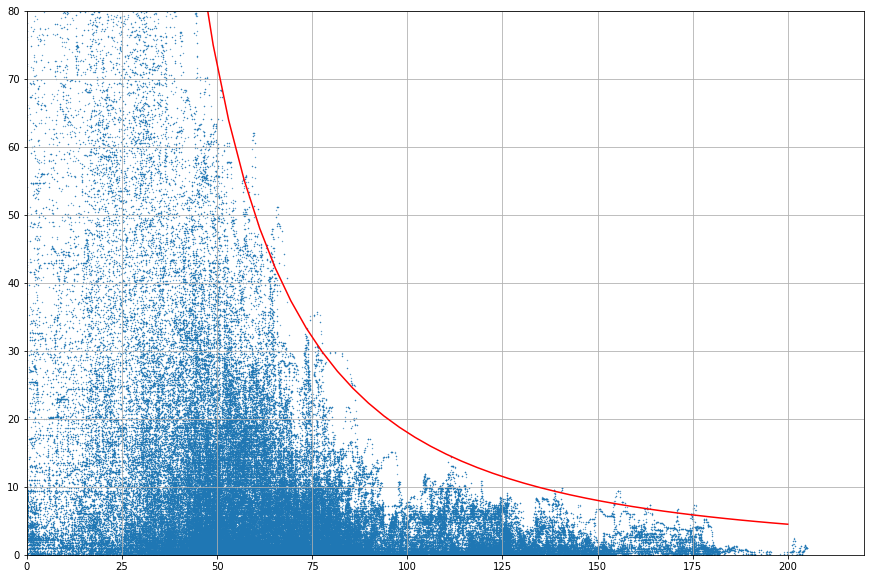

In [28]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.scatter(x=speeds, y=swas, s=.1)

vel = np.linspace(0, 200)
envelope = 180000/(vel**2)
envelope = np.clip(envelope, 0, 180)

plt.plot(vel, envelope, color='red')
plt.xlim(0, 220)
plt.ylim(0, 80)
plt.show()

# Steering wheel speed vs vehicle speed

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in true_divide


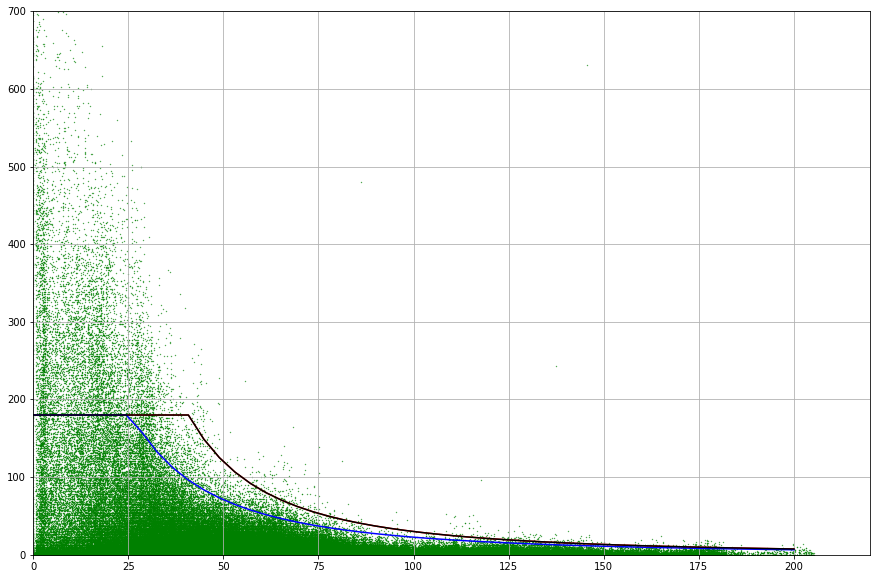

In [21]:
swas = multi_train_dataset.get_csv()['steering_wheel_angle']
steering_wheel_speed = swas.diff()
framerate = 15
steering_wheel_speed *= framerate
speeds = multi_train_dataset.get_csv()['speed']

swas

#remove -999 dummy speed value
no_speeds_indices = speeds[speeds < 0].index
#speeds = speeds.drop(no_speeds_indices)
#steering_wheel_speed = steering_wheel_speed.drop(no_speeds_indices)


steering_wheel_speed = abs(steering_wheel_speed)

from matplotlib import pyplot as plt
plt.figure(figsize=(15,10))
plt.grid(True)

plt.scatter(x=speeds, y=steering_wheel_speed, s=.1, color='green')

vel = np.linspace(0, 200)
envelope = 300000/(vel**2)
envelope2 = 300000/((vel+15)**2)
envelope3 = 300000/(vel**2)

envelope = np.clip(envelope, 0, 180)
envelope2 = np.clip(envelope2, 0, 180)
envelope3 = np.clip(envelope3, 0, 180)

plt.plot(vel, envelope, color='red')
plt.plot(vel, envelope2, color='blue')
plt.plot(vel, envelope3, color='black')

plt.xlim(0, 220)
plt.ylim(0, 700)
plt.show()

# SWA normalization

In [7]:
dummy_dataset = RoadDataset('','',[''])
dummy_dataset.normalize_swa(180)

Reading csv file: 
Failed to read csv file!
Loaded dataset with 0 samples


1.1277148766292124

In [35]:
dummy_dataset.denormalize_swa(1.5539)

998.9923936748692

In [29]:
swas = multi_train_dataset.get_csv()['steering_wheel_angle']
normed_swas = [dummy_dataset.normalize_swa(swa) for swa in swas]

In [34]:
max_normed_swa = max(np.abs(normed_swas))
print(max_normed_swa)

1.5539018996888188


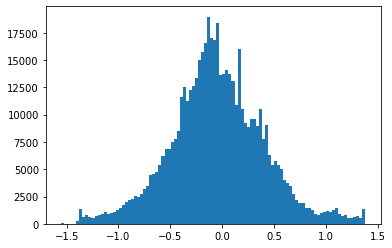

In [32]:
plt.hist(normed_swas, bins=100)
plt.show()